# Data Understanding

# Inhouds opgaven data understanding

## 1. Libraries
## 2. Data Import
## 3. Globale Overzicht Data
    3.1 Eerste Overzicht
    3.2 Type Overzicht 
    3.3 Verdeling Overzicht
    3.4 Na's Overzicht
    3.5 De Meetniveau's Overzicht
    3.6 Correlatie Overzicht 
    3.7 Conclusie Globale Overzicht
## 4. Kolommen Redundantie Onderzoek
    4.1 Redundante Kolommen
    4.2 Datatime Kolommen
    4.3 Business Understanding Toepassing
    4.4 Duplicaten rijen
    4.5 Dtype Kolommen
    4.6 Bijvoegen kollommen 
    4.7 Na Kolommen
    
## 5. Target variabele: Functie hersteltijd
    5.1 Overzicht functie hersteltijd duur
    5.2 Verdeling functie hersteltijd duur
## 6. Feature variabele Discrete en Continu
    6.1 Overzicht discreete en ratio feature variabele
    6.2 Functie herstel prognose 
    6.3 
    6.4
## 7. Feature variabele Nominaal
    7.1 Overzicht Nominaal variabele
    7.2 Oorzaak groep
    7.3 Oorzaak code
    7.4 Equipment nummer
    7.5 Equipment soort
    7.6 Prioriteit


## 1. Libraries

Importeren van de benodigde libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from category_encoders import LeaveOneOutEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Data Import

Hieronder importeren we het CSV bestand. We hebben alle kolommen die in de geleverde data dictionary als NVT aangemerkt zijn weggelaten doormiddel van een Exclusion List. Dit scheelt een hele hoop memory en zorgt dat we de gehele datset kunnen importeren zonder tegen memory issues aan te lopen. 

In [76]:
cols = list(pd.read_csv("sap_storing_data_hu_project.csv", nrows =1))
exclusion_list = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt','stm_mon_toelichting_trdl','stm_oh_pg_mld', 'stm_scenario_mon','stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst','stm_progfh_in_ddt','stm_progfh_in_invoer_ddt','stm_progfh_gw_ddt','stm_progfh_gw_lwd_ddt','stm_progfh_hz','stm_veroorz_groep','stm_veroorz_code','stm_veroorz_tekst_kort','stm_effect', 'stm_afspr_aanvangddt','stm_mon_eind_ddt','stm_mon_vhdsincident','stm_dir_betrok_tr','stm_aangelegd_dd','stm_aangelegd_tijd','stm_mon_begindatum','stm_mon_begintijd','stm_progfh_gw_datum','stm_progfh_gw_lwd_datum','stm_progfh_gw_lwd_tijd','stm_progfh_gw_duur','stm_afspr_aanvangdd','stm_afspr_aanvangtijd','stm_afspr_aanvangtijd','stm_mon_eind_tijd','stm_controle_dd','stm_akkoord_mon_toewijz','stm_status_sapnaarmon','stm_fact_jn','stm_akkoord_melding_jn','stm_afsluit_ddt','stm_afsluit_dd','stm_afsluit_tijd','stm_rec_toegev_ddt','stm_hinderwaarde','stm_actie','stm_standplaats','stm_status_gebr','stm_wbi_nummer','stm_projnr','stm_historie_toelichting','stm_schade_verhaalb_jn','stm_schadenr','stm_schade_status_ga','stm_schade_statusdatum','stm_relatiervo_vorig','stm_relatiervo_volgend','stm_relatiervo','stm_afspr_func_hersteldd','stm_afspr_func_hersteltijd','stm_sorteerveld','stm_rapportage_maand','stm_rapportage_jaar','stm_x_bron_publ_dt','stm_x_bron_bestandsnaam','stm_x_bron_arch_dt','stm_x_actueel_ind','stm_x_run_id','stm_x_bk','stm_x_start_sessie_dt','stm_x_vervallen_ind']
table = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False, usecols=[i for i in cols if i not in exclusion_list])
table.columns

Index(['Unnamed: 0', '#stm_sap_meldnr', 'stm_mon_nr', 'stm_vl_post',
       'stm_sap_meld_ddt', 'stm_sap_meldtekst_lang', 'stm_sap_meldtekst',
       'stm_geo_mld', 'stm_geo_mld_uit_functiepl', 'stm_equipm_nr_mld',
       'stm_equipm_soort_mld', 'stm_equipm_omschr_mld', 'stm_km_van_mld',
       'stm_km_tot_mld', 'stm_prioriteit', 'stm_status_melding_sap',
       'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_oh_pg_gst', 'stm_geo_gst',
       'stm_geo_gst_uit_functiepl', 'stm_equipm_nr_gst',
       'stm_equipm_soort_gst', 'stm_equipm_omschr_gst', 'stm_km_van_gst',
       'stm_km_tot_gst', 'stm_oorz_groep', 'stm_oorz_code', 'stm_oorz_tkst',
       'stm_fh_ddt', 'stm_fh_status', 'stm_sap_storeind_ddt',
       'stm_tao_indicator', 'stm_tao_indicator_vorige',
       'stm_tao_soort_mutatie', 'stm_tao_telling_mutatie',
       'stm_tao_beinvloedbaar_indicator', 'stm_evb', 'stm_sap_melddatum',
       'stm_sap_meldtijd', 'stm_contractgeb_mld', 'stm_functiepl_mld',
       'stm_techn_mld', 'stm_contra

Hier boven zijn de kolommen te zien waar we verder onderzoek naar gaan doen. Op eerste gezicht is er in de benaming all te zien dat er kollom tussen zullen zitten die niet relevant zijn voor het onderzoek neem bijvoorbeeld 'stm_sap_meldtekst_lang' en'stm_sap_meldtekst'.

In [77]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

 We passen de settings aan zodat alle colomen en meer rows getoond worden.

## 3. Globale Overzicht Data 

#### 3.1 Eerste Overzicht

We gaan hier eerst kijken naar het globale overzicht van de data. Op eerste gezicht lijken een paar tabellen zeer op elkaar, qua benaming en waardes. Neem 'stm_geo_mld' en 'stm_geo_mld_uit_functiepl' als voorbeeld waarin te zien is dat ze de zelfde waardes hebben. We gaan dit later verder ontleden, op deze manier kunnen we redundantie zo laag mogelijk houden en krijgen we een beter overzicht van de data.

In [78]:
table.head(5)

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 09:00:00,NaN,81S,624.0,624.0,NaN,NaN,NaN,0.0,0.0,ONR-RIB,133.0,Papieren ontbreken,02/01/2006 09:00:00,4.0,02/01/2006 09:00:00,N,NaN,NaN,0,B,"0,00",02/01/2006,09:00:00,NaN,624,NaN,81.0,624,S,02/01/2006,09:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,09:00:00,0.0,99999999.0,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2,50053213,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 12:35:00,NaN,37B,201.0,201.0,NaN,NaN,NaN,30200.0,0.0,ONR-DERD,143.0,NaN,02/01/2006 13:26:00,4.0,02/01/2006 13:26:00,N,NaN,NaN,0,NB,"0,00",02/01/2006,12:35:00,NaN,201,NaN,37.0,201,B,02/01/2006,12:35:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,13:26:00,51.0,99999999.0,02/01/2006,13:26:00,NaN,schapen op de spoorbaan!,NaN,NaN,Lp,Apg
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 16:40:00,NaN,32B,25.0,25.0,NaN,NaN,NaN,14000.0,0.0,ONR-DERD,142.0,NaN,02/01/2006 17:20:00,4.0,02/01/2006 17:20:00,N,NaN,NaN,0,NB,"0,00",02/01/2006,16:40:00,NaN,025,NaN,32.0,025,B,02/01/2006,16:40:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,17:20:00,40.0,99999999.0,02/01/2006,17:20:00,NaN,Persoon langs de baan,NaN,NaN,Hgl,NaN
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 22:30:00,NaN,35B,12.0,12.0,NaN,NaN,NaN,19819.0,0.0,ONR-DERD,142.0,NaN,02/01/2006 22:36:00,4.0,02/01/2006 22:36:00,N,NaN,NaN,0,NB,"0,00",02/01/2006,22:30:00,NaN,012,NaN,35.0,012,B,02/01/2006,22:30:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,22:36:00,6.0,99999999.0,02/01/2006,22:36:00,NaN,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN


#### 3.2 Type Overzicht

Als we kijken naar wat voor waardes er in onze dataset zitten zien we opvallend veel 'objects'. Als we kijken naar de benaming van veel van deze 'objects' zien we dat ze te maken hebben met datum of tijd. Dit verklaart waarom ze niet als een float of integer worden gezien. Later gaan wij deze waardes omzetten naar hun echte waardes, zodat we met ze kunnen werken.

In [79]:
table.dtypes

Unnamed: 0              object
#stm_sap_meldnr          int64
stm_mon_nr             float64
stm_vl_post             object
stm_sap_meld_ddt        object
                        ...   
stm_oorz_tekst_kort     object
stm_pplg_van            object
stm_pplg_naar           object
stm_dstrglp_van         object
stm_dstrglp_naar        object
Length: 70, dtype: object

#### 3.3 Verdeling Overzicht

Hier onder gaan we kijken of er op eerste gezicht verdeling te bepalen zijn. Er valt op dat veel kolommen hoge waardes hebben.  Hieruit kunnen we concluderen dat de data of veel uitschieters bevatten of geen kwantitatieve waardes zijn.

In [80]:
table.describe()

,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_code,stm_fh_status,stm_tao_telling_mutatie,stm_contractgeb_mld,stm_contractgeb_gst,stm_arbeid,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
count,8.985260e+05,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,741568.000000,6.057210e+05,8.985210e+05,8.985210e+05,845113.000000,747318.000000,898526.000000,661017.000000,898303.000000,8.984880e+05,898488.000000,898488.000000,8.984880e+05
mean,7.510690e+07,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,321.455539,1.062666e+07,2.664714e+04,1.245256e+04,193.577248,1.802484,0.143858,25.261916,25.117415,3.976436e+06,0.201329,923.148771,8.845657e+07
std,1.113009e+07,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,270.687469,4.755891e+05,7.841763e+04,6.410697e+04,48.310779,1.182432,0.373983,19.725904,19.444268,1.990988e+07,0.498747,6404.546787,2.712747e+08
min,0.000000e+00,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,33.000000,1.000000,-1.000000,0.000000,0.000000,-1.167950e+05,0.000000,0.000000,0.000000e+00
25%,8.035472e+07,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,79.000000,1.021172e+07,0.000000e+00,0.000000e+00,144.000000,1.000000,0.000000,9.000000,9.000000,0.000000e+00,0.000000,11.000000,1.800000e+01
50%,8.063615e+07,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,203.000000,1.056452e+07,5.000000e+03,0.000000e+00,213.000000,1.000000,0.000000,22.000000,23.000000,3.000000e+00,0.000000,84.000000,6.700000e+01
75%,8.079029e+07,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,545.000000,1.092778e+07,3.751500e+04,0.000000e+00,221.000000,2.000000,0.000000,33.000000,32.000000,4.700000e+01,0.000000,256.000000,1.318000e+03
max,1.000000e+08,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,952.000000,3.039590e+07,3.096056e+07,3.096056e+07,999.000000,9.000000,1.000000,99.000000,99.000000,1.057679e+09,150.000000,528297.000000,1.060469e+09


#### 3.4 Na's Overzicht

Hieronder bekijken we de NA's waardes. Zoals we kunnen zien zijn er bij de meeste tabellen vrij veel NA's waardes. En er zijn sommige die er minder dan 10 hebben, wat opvalt is dat dit tabellen zijn die met afstanden zoals km te maken hebben. Wat ook opmerkelijk is dat de tabellen gerelateerd aan tijd en/of datum 38 NA's hebben. 

In [81]:
table.isna().sum()

Unnamed: 0                  0
#stm_sap_meldnr             0
stm_mon_nr                  1
stm_vl_post            588027
stm_sap_meld_ddt            1
                        ...  
stm_oorz_tekst_kort    509896
stm_pplg_van           643777
stm_pplg_naar          838138
stm_dstrglp_van        589042
stm_dstrglp_naar       532766
Length: 70, dtype: int64

We gaan kijken of we kunnen achterhalen waarom bepaalde kolommen hoge aantal Na's waardes hebben in vergelijking tot de andere kolommen. 

In [82]:
table['stm_km_van_gst'].sort_values()

1         0.0
470413    0.0
470412    0.0
470409    0.0
470402    0.0
         ... 
0         NaN
261492    NaN
896775    NaN
896793    NaN
898179    NaN
Name: stm_km_van_gst, Length: 898526, dtype: float64

De rede dat er zo weinig Na's waardes zitten in de tabellen is omdat ze worden ingevuld met '0.0'. We kijken of de hoeveelheid 0's ongeveer overheen komt met het gemiddelde aantal NA's als in de andere tabellen.

In [83]:
print('NaN mean:', table.isna().sum().mean())
print(table['stm_km_van_gst'].value_counts())

NaN mean: 147618.1857142857
0.0        397523
80140.0      4175
34930.0      3127
84200.0      2827
80780.0      2676
            ...  
18047.0         1
69652.0         1
89503.0         1
28740.0         1
40350.0         1
Name: stm_km_van_gst, Length: 35335, dtype: int64


In [84]:
print(table['stm_fh_duur'].value_counts())

0.0        171713
5.0          6825
3.0          6389
6.0          5599
7.0          5389
            ...  
32622.0         1
6503.0          1
43224.0         1
7620.0          1
22630.0         1
Name: stm_fh_duur, Length: 16930, dtype: int64


Hieruit kunnen we zien dat een groot deel van de data opgevuld is met 0 wat later geïnterpreteerd kan worden als NaN waardes. Verder kunnen we hier onder zien dat er geen een kolommen zijn is waar 0 waarde niet missen.

In [85]:
table.dropna()

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar


#### 3.5 De Meetniveau's Overzicht

We gaan hier onder bepalen wat de meetwaardes zijn voor iedere kolom.

In [86]:
table.sample(3)

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
375347,381766,80543323,0.0,NaN,29/01/2010 14:10:00,"Ww depot vk.spoor 1,uiterste zijde ri.Zp,geef...","Ww depot vk.spoor 1,uiterste zijde ri.Zp",607,607.0,NaN,NaN,NaN,0.0,0.0,5.0,MAFS,29/01/2010 14:10:00,29/01/2010 16:14:00,30E,607.0,607.0,10551899.0,DEPOTVOED,"Depotvoeding 1.1.1, Empl Ww",43427.0,0.0,TECHONV,221.0,Er zijn 4 bouten vervangen van de WCD.,29/01/2010 16:40:00,1.0,29/01/2010 16:40:00,N,NaN,NaN,0,B,"0,00",29/01/2010,14:10:00,NaN,607,NaN,30.0,607-431-1000023109,E,29/01/2010,14:10:00,29/01/2010,16:14:00,26.0,29/01/2010,16:40:00,05/02/2010,10:07:31,26,00:00:00,0.0,29/01/2010,16:40:00,150.0,124.0,29/01/2010,16:40:00,NaN,Er zijn 4 bouten vervangen van de WCD.,NaN,NaN,NaN,NaN
216282,222214,80344130,0.0,NaN,09/01/2006 08:52:27,Hmta; wsl 313 strijkregelstoel 3 keer moet ve...,Hmta; wsl 313 strijkregelstoel 3 keer mo,139,139.0,10265632.0,WISSEL,139 Hmta wl 313,0.0,0.0,5.0,MAFS,09/01/2006 08:52:48,09/01/2006 09:00:00,09B,139.0,139.0,10265632.0,WISSEL,139 Hmta wl 313,0.0,0.0,TECHONV,220.0,3 x strijkregelstoel vervangen. Gestoord obje...,09/01/2006 11:15:00,1.0,09/01/2006 11:16:00,N,NaN,NaN,0,B,"0,00",09/01/2006,08:52:27,9.0,139-302-1000099274,B,9.0,139-302-1000099274,B,09/01/2006,08:52:48,09/01/2006,09:00:00,135.0,09/01/2006,16:00:00,09/01/2006,11:45:28,420,00:00:00,0.0,09/01/2006,11:15:00,142.0,7.0,09/01/2006,11:16:00,NaN,3 x strijkregelstoel defect.,NaN,NaN,NaN,NaN
810065,819125,80870622,0.0,NaN,19/11/2016 15:44:05,Hgl : Wl-173A/B LL n.i.c.(1x),Hgl : Wl-173A/B LL n.i.c.(1x),543,543.0,10201555.0,WISSEL,543 Wl 173A/171B EW 1:9,45272.0,45303.0,4.0,MINB PAGE,19/11/2016 15:44:06,21/11/2016 07:00:01,32S,543,543.0,10201555.0,WISSEL,543 Wl 173A/171B EW 1:9,45272.0,45303.0,TECHONV,218.0,Geen onderzoek.,21/11/2016 09:00:00,1.0,21/11/2016 09:05:00,N,N,NaN,0,B,"0,00",19/11/2016,15:44:05,32.0,543-302-1000078673,B,32.0,543-302-1000078673,S,19/11/2016,15:44:06,21/11/2016,07:00:01,0.0,21/11/2016,09:30:01,20161121,09:00:14,150,00:00:00,0.0,21/11/2016,09:00:00,2476.0,2356.0,21/11/2016,09:05:00,NaN,Geen onderzoek.,NaN,NaN,NaN,NaN


We gaan hier de meetniveau ‘s van de variabelen bepalen op inzicht van de data hier boven met bussnins understanding.

- Nominaal: Unnamed, stm_sap_meldnr, stm_mon_nr, stm_vl_post, stm_sap_meldtekst_lang, stm_sap_meldtekst, stm_geo_mld, stm_geo_mld_uit_functiepl, stm_equipm_nr_mld, stm_equipm_soort_mld, stm_equipm_omschr_mld, stm_prioriteit, stm_status_melding_sap, stm_oh_pg_gst, stm_geo_gst, stm_geo_gst_uit_functiepl, stm_equipm_nr_gst, stm_equipm_soort_gst, stm_equipm_omschr_gst, stm_oorz_groep, stm_oorz_code, stm_oorz_tkst, stm_fh_status, stm_tao_indicator, stm_tao_indicator_vorige, stm_tao_soort_mutatie, stm_contractgeb_mld, stm_arbeid, stm_functiepl_mld, stm_techn_mld, stm_contractgeb_gst, stm_functiepl_gst, stm_functiepl_gst, stm_techn_gst, stm_arbeid, stm_oorz_tekst_kort, stm_pplg_van, stm_pplg_naar, stm_dstrglp_van, stm_dstrglp_naar, stm_tao_beinvloedbaar_indicator

- Ordinaal: -

- Discreet: stm_sap_melddatum, stm_sap_meld_ddt, stm_aanngeb_ddt, stm_aanntpl_ddt, stm_tao_telling_mutatie, stm_sap_meld_ddt, stm_sap_storeind_ddt, stm_sap_meldtijd, stm_aanngeb_tijd, stm_aanngeb_dd, stm_aanntpl_dd, stm_aanntpl_tijd, stm_progfh_in_datum, stm_progfh_in_tijd, stm_progfh_in_invoer_dat, stm_progfh_in_invoer_tijd, stm_progfh_gw_tijd, stm_progfh_gw_teller, stm_fh_dd, stm_fh_tijd, stm_sap_storeinddatum, stm_sap_storeindtijd, stm_mon_eind_datum, stm_fh_ddt

- Continu: stm_km_van_mld, stm_km_tot_mld, stm_km_van_gst, stm_km_tot_gst, stm_evb, stm_fh_duur, stm_reactie_duur, stm_progfh_in_duur	

#### 3.6 Correlatie Overzicht 

Voor de kolommen waar het van toepassing is gaan we kijken of we een correlatie kunnen vinden. 

<AxesSubplot:>

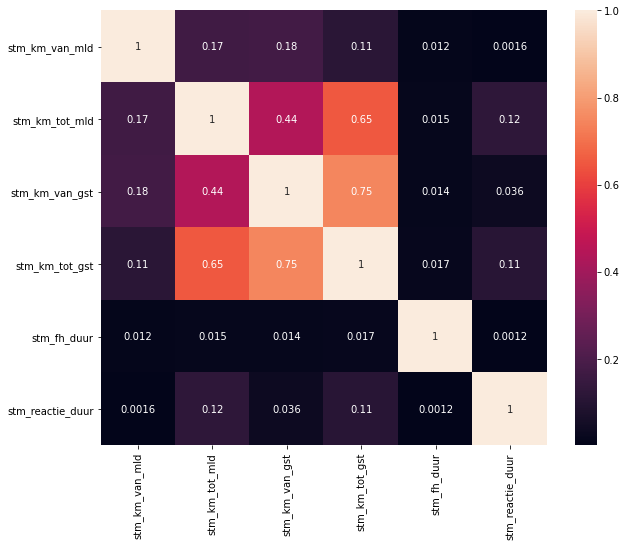

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(table[['stm_km_van_mld', 'stm_km_tot_mld', 'stm_km_van_gst', 'stm_km_tot_gst', 'stm_fh_duur', 'stm_evb', 'stm_reactie_duur', 'stm_progfh_in_duur']].corr(), annot=True, ax=ax)

Op eerste gezicht kunnen we geen corrolatie vinden van boven de 1.7 %

#### 3.7 Conclusie Globale Overzicht

Op eerste gezicht is er te zien dat we hier te maken hebben met veel Kwalitatieve (nominale) waardes. Daarnaast hebben de continue waardes die er zijn weinig correlatie met elkaar. Er zal verder onderzoek gedaan moeten worden in de nominale kolommen om er achter te komen of ze van belang zijn.  

## 4. Kolommen Redundantie Onderzoek

In dit hoofstuk gaan we kijken naar de verschillende kolommen en de duplicaten of redundante informatie. Hier door kunnen we een beter overzicht krijgen over de data die er beschikbaar is.

#### 4.1 Redundante Kolommen 

Hier onder nemen we een kijk of er op eerst oog opslag redundante kolommen aanwezig zijn. 

In [88]:
table.sample(4)

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
425434,431989,80605861,0.0,NaN,08/03/2011 11:14:00,Hvs : infoplus 10404 tijd niet juist,Hvs : infoplus 10404 tijd niet juist,528,528.0,11083704.0,VISUELERIS,Hvs TB-1-fts-1(10404),28983.0,0.0,4.0,MAFS,08/03/2011 11:14:00,08/03/2011 11:16:00,52P,506.0,506.0,10636415.0,TBHHARDW,TVTK 06-024 AMF RVL TDL OMR (AMFS62/AMFX,44630.0,0.0,TECHONV,294.0,Na het resetten van PUBLICATIE,08/03/2011 11:24:00,2.0,08/03/2011 11:25:00,N,NaN,NaN,0,B,"0,00",08/03/2011,11:14:00,52.0,528-808-1000126119,T,52.0,506-501-1000067668,P,08/03/2011,11:14:00,08/03/2011,11:16:00,8.0,NaN,00:00:00,NaN,00:00:00,99999999,00:00:00,0.0,08/03/2011,11:24:00,10.0,2.0,08/03/2011,11:25:00,NaN,NaN,NaN,NaN,NaN,NaN
373932,380347,80541579,730984.0,ZL,19/01/2010 12:12:00,Apd : Wsl 25 LL nic,Apd : Wsl 25 LL nic,608,608.0,10201965.0,WISSEL,Apd Ewl 25/27A,0.0,0.0,2.0,MAFS,19/01/2010 12:12:00,19/01/2010 12:38:00,31B,608.0,608.0,10201965.0,WISSEL,Apd Ewl 25/27A,0.0,0.0,TECHONV,221.0,Magneet naast ES-las was t.o.r. opgeschoven d...,19/01/2010 13:04:00,1.0,19/01/2010 13:38:00,J,NaN,Nieuw,1,B,"0,00",19/01/2010,12:12:00,31.0,608-302-1000026018,B,31.0,608-302-1000026018,B,19/01/2010,12:12:00,19/01/2010,12:38:00,26.0,19/01/2010,13:15:00,19/01/2010,13:38:17,37,00:00:00,0.0,19/01/2010,13:04:00,52.0,26.0,19/01/2010,13:38:00,19/01/2010,NaN,APD,NaN,APD,APDA
355036,361375,80517848,616512.0,EHV,14/08/2009 10:00:00,Btl : Wl-1115A/B RL n.i.c.,Btl : Wl-1115A/B RL n.i.c.,617,617.0,10527816.0,WISSEL,617 Btl wissel 1115A,0.0,0.0,2.0,MAFS,14/08/2009 10:00:00,14/08/2009 10:26:00,23S,617.0,617.0,10527816.0,WISSEL,617 Btl wissel 1115A,0.0,0.0,TECHONV,218.0,Bij onderzoek geen onregelmatigheden aangetro...,14/08/2009 12:01:00,4.0,14/08/2009 12:02:00,J,NaN,Nieuw,1,B,"0,00",14/08/2009,10:00:00,23.0,617-302-1000045391,B,23.0,617-302-1000045391,S,14/08/2009,10:00:00,14/08/2009,10:26:00,95.0,14/08/2009,11:26:00,14/08/2009,10:28:06,60,12:30:00,1.0,14/08/2009,12:01:00,121.0,26.0,14/08/2009,12:02:00,14/08/2009,NaN,BTL,NaN,BTL,OT
311062,317236,80462395,0.0,NaN,30/06/2008 11:00:00,Hlg. Bliksemafleider manco van Relaishuis. Pr...,Hlg. Bliksemafleider manco van Relaishui,1,1.0,NaN,NaN,NaN,0.0,0.0,5.0,MAFS MAFD,30/06/2008 11:02:00,NaN,36S,1.0,1.0,10751936.0,GEBOUW,SK10 Hlg-Lw/Hlg,1147.0,0.0,ONR-DERD,145.0,Gestoord object: SK 10 Hlg. Gestoord onderdee...,01/07/2008 09:50:00,2.0,02/07/2008 10:09:00,N,NaN,NaN,0,NB,"0,00",30/06/2008,11:00:00,NaN,001,NaN,36.0,001-105-1000000683,S,30/06/2008,11:02:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999,00:00:00,0.0,01/07/2008,09:50:00,1368.0,99999999.0,02/07/2008,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN


We kunnen zien dat de tekst en omschrijving kolommen te veel van elkaar afwijken en niet gebruikt zouden kunnen worden voor predictie modellen. Ook zijn er een aantal rijen met duplicate informatie zoals 'Unnamed: 0' is reduantant het is het index nummer van de rijen.

In [89]:
table[['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_functiepl_gst', 'stm_geo_gst_uit_functiepl', 'stm_arbeid', 'stm_evb']].sample(3)

,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_oorz_tkst,stm_oorz_tekst_kort,stm_equipm_omschr_mld,stm_equipm_omschr_gst,Unnamed: 0,stm_functiepl_gst,stm_geo_gst_uit_functiepl,stm_arbeid,stm_evb
876939,Shl : Shl tunnel meld en bestuur systeem gest...,Shl : Shl tunnel meld en bestuur systee,UPs spanningsloos,UPs spanningsloos,SHL MBS PLC Sectie 1 Km 12.220,SHL MBS PLC Sectie 1 Km 12.220,886791,133-202-1000046069,133.0,0.0,"0,00"
69966,Zlw : Km 17.4 - 18.4,Zlw : Km 17.4 - 18.4,Geen SMC-melding,Geen SMC-melding,NaN,NaN,72019,119,119.0,0.0,"0,00"
842470,"Amf : Wp-3-021, inloggen in HARM niet mogelijk.","Amf : Wp-3-021, inloggen in HARM niet mo",gebruiker weer actief gemaakt gebruiker weer ...,gebruiker weer actief gemaakt,Post21 werkplekken Amersfoort,Post21 werkplekken Amersfoort,851883,506-501-1000064600,506.0,0.0,"0,00"


Voor verder onderzoek verwijderen we hier onder de redundante tekst kollommen

In [90]:
table = table.drop(['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_geo_gst_uit_functiepl', 'stm_functiepl_gst', 'stm_arbeid', 'stm_evb'], axis=1)

#### 4.2 Datatime Kolommen

Eerst gaan we kijken naar de verschillende data en time kolommen. Hier onder is er te zien dat veel kolommen informatie is die in andere kolommen verwerkt is zoals 'stm_sap_meld_ddt' en stm_sap_melddatum. 

In [91]:
table[['stm_sap_melddatum', 'stm_sap_meld_ddt', 'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum', 'stm_fh_ddt']].sample(3)

,stm_sap_melddatum,stm_sap_meld_ddt,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_sap_storeind_ddt,stm_sap_meldtijd,stm_aanngeb_tijd,stm_aanngeb_dd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_gw_tijd,stm_fh_dd,stm_fh_tijd,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_fh_ddt
879420,17/10/2018,17/10/2018 19:04:05,17/10/2018 19:04:07,18/10/2018 00:30:00,18/10/2018 05:31:01,19:04:05,19:04:07,17/10/2018,18/10/2018,00:30:00,18/10/2018,05:20:00,18/10/2018,02:14:24,05:20:00,18/10/2018,05:25:00,18/10/2018,05:31:01,NaN,18/10/2018 05:25:00
897135,23/02/2014,23/02/2014 07:57:00,23/02/2014 07:57:00,NaN,NaN,07:57:00,07:57:00,23/02/2014,NaN,00:00:00,NaN,00:00:00,NaN,00:00:00,00:00:00,23/02/2014,08:14:00,NaN,00:00:00,NaN,23/02/2014 08:14:00
810153,20/11/2016,20/11/2016 10:34:59,20/11/2016 10:34:59,20/11/2016 11:30:00,20/11/2016 11:45:00,10:34:59,10:34:59,20/11/2016,20/11/2016,11:30:00,20/11/2016,11:45:00,20161120,11:45:12,00:00:00,20/11/2016,11:45:00,20/11/2016,11:45:00,20/11/2016,20/11/2016 11:45:00


Hier onder worden de kolommen die zullen worden verwijdert getoond. Deze kolommen zijn duplicaten van informatie ook worden twee anderen kolommen verwijdert stm_sap_storeind_ddt en stm_sap_meld_ddt. Deze kolommen zijn niet relevant omdat ze na de gewenste predictie tijd plaats vinden.

In [92]:
table[['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd','stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum']].sample(3)

,stm_sap_melddatum,stm_sap_storeind_ddt,stm_sap_meldtijd,stm_aanngeb_tijd,stm_aanngeb_dd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_gw_tijd,stm_fh_dd,stm_fh_tijd,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum
465913,27/02/2012,28/02/2012 11:40:00,15:22:00,15:27:00,27/02/2012,27/02/2012,16:21:00,27/02/2012,16:21:00,29/02/2012,16:22:11,16:25:00,27/02/2012,16:27:00,28/02/2012,11:40:00,NaN
616758,15/04/2014,15/04/2014 16:01:00,11:08:55,11:12:42,15/04/2014,15/04/2014,15:00:00,NaN,00:00:00,NaN,00:00:00,00:00:00,15/04/2014,16:00:00,15/04/2014,16:01:00,NaN
876679,11/09/2018,12/09/2018 03:44:57,07:44:41,07:44:43,11/09/2018,12/09/2018,00:35:01,12/09/2018,04:36:01,12/09/2018,03:36:12,04:36:01,12/09/2018,03:36:18,12/09/2018,03:44:57,12/09/2018


We halen voor verder onderzoek de duplicaten kolommen uit de dataset

In [93]:
table = table.drop(['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum'], axis=1)

In [94]:
table[['stm_sap_meld_ddt', 'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_fh_ddt']].sample(3)

,stm_sap_meld_ddt,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_fh_ddt
180339,26/02/2018 08:51:11,26/02/2018 09:02:47,26/02/2018 09:12:00,26/02/2018 09:15:00
767893,18/05/2016 10:39:48,18/05/2016 10:39:48,18/05/2016 12:58:00,18/05/2016 13:34:00
510733,08/02/2013 13:04:00,08/02/2013 13:04:00,08/02/2013 13:30:00,08/02/2013 14:25:00


Hier boven zien we de vier datetime colomen die we mee gaan nemen. 

#### 4.3 Business Understanding Toepassing

Voor de gewenste predictie is het van belang dat we de rijen en kolommen gebruiken die van belang zijn voor het model. Voor het voospellen van kortere storingen zijn rijen boven de 10 uur niet van belang. Hieronder halen we alle waardes uit de tabel waarbij het functieherstel langer dan 10 uur duren.

In [95]:
table = table[table['stm_fh_duur'] <= 600]

We kunnen ook de storingen die minder dan 0 minuten duren verwijderen omdat een voorspelling voor die storingen niet relevant is. Daarnaast is er hieronder ook te zien dat storingen van 0 minuut een prognose hebben van 0 of 999999 minuten.

In [96]:
table[table['stm_fh_duur'] <= 0].filter(like='duur').sample(3)

,stm_progfh_in_duur,stm_fh_duur,stm_reactie_duur
8494,99999999,0.0,99999999.0
2124,99999999.0,0.0,99999999.0
24581,99999999,0.0,99999999.0


Voor verder onderzoek wordt hier onder de row van functie herstel duur onder de 0 minuut verwijdert

In [97]:
table = table[table['stm_fh_duur'] > 0]

Verder zijn er een aantal kolommen niet relevant voor het huidige onderzoek. Zoals de betrokken VL post, monitoringsnummer. Deze halen we voor verder onderzoek uit consideratie en de dataset.

In [98]:
table[['stm_vl_post', 'stm_mon_nr']].sample(3)

,stm_vl_post,stm_mon_nr
850184,NaN,0.0
155652,UT,4316931.0
713400,NaN,0.0


In [99]:
table = table.drop(['stm_vl_post', 'stm_mon_nr'], axis=1)

#### 4.4 Duplicaten rijen

In de data zijn verschillende duplicaten op te merken van hetzelfde #stm_sap_meldnr, functie hersteltijd en meld datum. Er is hier onder te zien dat de kolommen met het zelfde meldt nummer alleen op PPLG, DSTR en Tao kolommen veranderen in waardes. We hebben ervoor gekozen om deze duplicaat rijen te verwijderen uit de data.

In [100]:
table[table.duplicated('#stm_sap_meldnr', keep = False)].sort_values(by=['#stm_sap_meldnr']).head(6)

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_fh_ddt,stm_fh_status,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
35216,50117666,10/01/2013 10:42:00,541.0,541.0,NaN,NaN,13100.0,13200.0,9.0,MAFS,11/01/2013 05:00:00,NaN,11S,541.0,NaN,NaN,13100.0,13200.0,TECHONV,221.0,11/01/2013 05:03:00,4.0,J,NaN,Nieuw,1,B,NaN,541,NaN,11.0,S,99999999,0.0,3.0,99999999.0,KV,NaN,WP,VTBR
35217,50117666,10/01/2013 10:42:00,541.0,541.0,NaN,NaN,13100.0,13200.0,9.0,MAFS,11/01/2013 05:00:00,NaN,11S,541.0,NaN,NaN,13100.0,13200.0,TECHONV,221.0,11/01/2013 05:03:00,4.0,J,J,Ongewijzigd,0,B,NaN,541,NaN,11.0,S,99999999,0.0,3.0,99999999.0,NaN,WP,VTBR,00/00/0000
35407,50117856,15/01/2013 15:51:00,507.0,507.0,10201352.0,WISSEL,93639.0,0.0,9.0,MAFS,15/01/2013 15:51:00,NaN,30B,507.0,10201352.0,WISSEL,93639.0,0.0,TECHONV,299.0,15/01/2013 16:16:00,1.0,J,NaN,Nieuw,1,B,30.0,507-302-1000072761,B,30.0,B,99999999,0.0,25.0,99999999.0,VA,NaN,AH,VA
35408,50117856,15/01/2013 15:51:00,507.0,507.0,10201352.0,WISSEL,93639.0,0.0,9.0,MAFS,15/01/2013 15:51:00,NaN,30B,507.0,10201352.0,WISSEL,93639.0,0.0,TECHONV,299.0,15/01/2013 16:16:00,1.0,J,J,Ongewijzigd,0,B,30.0,507-302-1000072761,B,30.0,B,99999999,0.0,25.0,99999999.0,NaN,AH,VA,00/00/0000
35633,50118095,25/01/2013 23:13:00,133.0,133.0,NaN,NaN,0.0,0.0,9.0,MAFS,26/01/2013 05:01:00,NaN,08B,133.0,NaN,NaN,18600.0,19100.0,ONR-DERD,142.0,26/01/2013 05:05:00,4.0,J,NaN,Nieuw,1,NB,NaN,133,NaN,8.0,B,99999999,0.0,4.0,99999999.0,HFD,NaN,HFD,SHL
35634,50118095,25/01/2013 23:13:00,133.0,133.0,NaN,NaN,0.0,0.0,9.0,MAFS,26/01/2013 05:01:00,NaN,08B,133.0,NaN,NaN,18600.0,19100.0,ONR-DERD,142.0,26/01/2013 05:05:00,4.0,J,J,Ongewijzigd,0,NB,NaN,133,NaN,8.0,B,99999999,0.0,4.0,99999999.0,NaN,HFD,SHL,00/00/0000


Voor verder onderzoek worden de duplicaten hier onder verwijdert

In [101]:
print(table.shape)
table.drop_duplicates(subset=['#stm_sap_meldnr'],inplace=True, keep='last')
print(table.shape)

(579887, 40)
(374871, 40)


#### 4.7 Na Kolommen

Hier nemen we een diepere blik in de kolommen met Na's waardes.

In [102]:
print("Totaal aantal rows:", table.shape[0])

Totaal aantal rows: 374871


Hier onder zie je een lijst met de aantal Na's per kolom.

In [103]:
table.isna().sum().sort_values(ascending=False).head(10)

stm_pplg_naar               358974
stm_tao_soort_mutatie       312623
stm_pplg_van                302525
stm_dstrglp_van             288473
stm_dstrglp_naar            280763
stm_tao_indicator_vorige    254823
stm_equipm_soort_gst         90328
stm_equipm_nr_gst            90322
stm_contractgeb_mld          69670
stm_equipm_soort_mld         69641
dtype: int64

Gebaseerd op de aantal Na's en de totaal aantal kolommen verwijderen we de kolommen die te veel na's hebben. Deze kolommen bevatten te weinig informatie om iets relevants te zeggen over de data. Alles waar meer dan 200000 missende items in zitten verwijderen van consideratie als target of feature variablen

In [104]:
table[['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar']].sample(3)

,stm_tao_indicator_vorige,stm_pplg_naar,stm_tao_soort_mutatie,stm_pplg_van,stm_dstrglp_van,stm_dstrglp_naar
206104,N,NaN,NaN,NaN,NaN,NaN
802698,N,NaN,NaN,NaN,NaN,NaN
711630,NaN,NaN,NaN,NaN,NaN,NaN


Hierboven zie je kolommen die verwijderd worden voor te veel NaN waardes. Daarnaast zeggen de kolommen van uit een business perspectief niet veel over de duur van de van functie herstel.

Hier onder halen we voor verder onderzoek de kolomen uit de de data set

In [105]:
table = table.drop(['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar'], axis=1)

Verder kunnen we hier onder zien dat we nog een aantal na's in de data set hebben zitten. Deze gaan we met wat business understanding verwerken.

In [106]:
table.isna().sum().sort_values(ascending=False).head(10)

stm_equipm_soort_gst    90328
stm_equipm_nr_gst       90322
stm_contractgeb_mld     69670
stm_equipm_soort_mld    69641
stm_equipm_nr_mld       69639
stm_techn_mld           69198
stm_geo_gst             60964
stm_aanntpl_ddt         24420
stm_oorz_groep           6404
stm_oorz_code            6401
dtype: int64

We hebben voor de overige kolommen ervoor gekozen om de nan waardes te veranderen naar een None en 0 categorie waar dat van toepassing is. Neem stm_equipm_soort_gst, stm_equipm_soort_mld als voorbeeld: Er is niet altijd equipment nodig om een probleem op te lossen dit is geen valse data maar niet van toepassing. Dit geldt ook voor de geo locatie en soort kolommen 

In [107]:
table[table['stm_equipm_soort_mld'].isna()].head(3)

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_fh_ddt,stm_fh_status,stm_tao_indicator,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
2,50053213,02/01/2006 12:35:00,201.0,201.0,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 12:35:00,NaN,37B,201.0,NaN,NaN,30200.0,0.0,ONR-DERD,143.0,02/01/2006 13:26:00,4.0,N,0,NB,NaN,201,NaN,37.0,B,99999999.0,0.0,51.0,99999999.0
3,50053214,02/01/2006 16:40:00,25.0,25.0,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 16:40:00,NaN,32B,25.0,NaN,NaN,14000.0,0.0,ONR-DERD,142.0,02/01/2006 17:20:00,4.0,N,0,NB,NaN,025,NaN,32.0,B,99999999.0,0.0,40.0,99999999.0
4,50053215,02/01/2006 22:30:00,12.0,12.0,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 22:30:00,NaN,35B,12.0,NaN,NaN,19819.0,0.0,ONR-DERD,142.0,02/01/2006 22:36:00,4.0,N,0,NB,NaN,012,NaN,35.0,B,99999999.0,0.0,6.0,99999999.0


Hier onder zetten we voor verder onderzoek de na's over naar bijbehorende None of 0 waardes.

In [108]:
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].fillna('None')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].fillna('None')
table['stm_geo_gst'] = table['stm_geo_gst'].fillna('None')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].fillna('None')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna('None')
table['stm_techn_mld'] = table['stm_techn_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna(0)

Voor de overige na waardes hebben we besloten om in plaats van ze individueel uit te gaan zoeken ze te verwijderen. Op het groten geheel is de data die we verliezen klein.

In [109]:
print('Totaal aantal: ', table.shape[0])
print('Totaal na verwijderen: ', (table.dropna().shape[0] - 24420))
table.isna().sum().sort_values(ascending=False).head(10)

Totaal aantal:  374871
Totaal na verwijderen:  322807


stm_aanntpl_ddt              24420
stm_oorz_groep                6404
stm_oorz_code                 6401
stm_fh_status                 1284
stm_fh_ddt                     421
stm_geo_mld_uit_functiepl      316
stm_geo_mld                    314
stm_functiepl_mld              314
stm_techn_gst                  127
stm_contractgeb_gst            127
dtype: int64

#### 4.5 Dtype Kolommen

Hier gaan we kijken of we van de overige kolommen de dtypes kunnen omzetten naar meetbare waardes voor verder onderzoek. Het is ook opgevallen dat er in sommige rijen data zit die inconsistent zijn met voorgaande regels. deze regels verwijderen we uit de dataset

In [110]:
table.dtypes.head(10)

#stm_sap_meldnr                int64
stm_sap_meld_ddt              object
stm_geo_mld                   object
stm_geo_mld_uit_functiepl    float64
stm_equipm_nr_mld             object
stm_equipm_soort_mld          object
stm_km_van_mld               float64
stm_km_tot_mld               float64
stm_prioriteit               float64
stm_status_melding_sap        object
dtype: object

Voor verder onderzoek verwijderen wie hier onder de rijen met inconsistente regels en zetten we de kolommen om naar de bij behorende type.

In [112]:
table['stm_aanntpl_ddt'] = pd.to_datetime(table['stm_aanntpl_ddt'], errors='coerce', dayfirst=False, infer_datetime_format=True)
table['stm_aanngeb_ddt'] = pd.to_datetime(table['stm_aanngeb_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True)
table['stm_sap_meld_ddt'] = pd.to_datetime(table['stm_sap_meld_ddt'], errors='coerce', dayfirst=True,infer_datetime_format=True)
table['stm_fh_ddt'] = pd.to_datetime(table['stm_fh_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True) 
table['stm_aanntpl_ddt'] = table['stm_aanntpl_ddt'].fillna(table['stm_sap_meld_ddt'])

table['stm_reactie_duur'] =  pd.to_numeric(table['stm_reactie_duur'], errors='coerce')
table['stm_fh_duur'] =  pd.to_numeric(table['stm_fh_duur'], errors='coerce')
table['stm_progfh_gw_teller'] =  pd.to_numeric(table['stm_progfh_gw_teller'], errors='coerce')
table['stm_progfh_in_duur'] =  pd.to_numeric(table['stm_progfh_in_duur'], errors='coerce')
table['stm_tao_telling_mutatie'] =  pd.to_numeric(table['stm_tao_telling_mutatie'], errors='coerce', downcast='float')

table['stm_km_van_gst'] =  pd.to_numeric(table['stm_km_van_gst'], errors='coerce')
table['stm_km_tot_gst'] =  pd.to_numeric(table['stm_km_tot_gst'], errors='coerce')
table['stm_km_tot_mld'] =  pd.to_numeric(table['stm_km_tot_mld'], errors='coerce')
table['stm_km_van_mld'] =  pd.to_numeric(table['stm_km_van_mld'], errors='coerce')

table['stm_techn_gst'] = table['stm_techn_gst'].astype('category')
table['stm_contractgeb_gst'] = table['stm_contractgeb_gst'].astype('category')
table['stm_techn_mld'] = table['stm_techn_mld'].astype('category')
table['stm_tao_beinvloedbaar_indicator'] = table['stm_tao_beinvloedbaar_indicator'].astype('category')
table['stm_techn_mld'] = table['stm_techn_mld'].astype('category')
table['stm_functiepl_mld'] = table['stm_functiepl_mld'].astype('category')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].astype('category')
table['stm_geo_mld'] = table['stm_geo_mld'].astype('category')
table['stm_fh_status'] = table['stm_fh_status'].astype('category')
table['stm_oorz_code'] = table['stm_oorz_code'].astype('category')
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].astype('category')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].astype('category')
table['stm_oh_pg_gst'] = table['stm_oh_pg_gst'].astype('category')
table['stm_geo_mld'] = table['stm_geo_mld'].astype('category')
table['stm_status_melding_sap'] = table['stm_status_melding_sap'].astype('category')
table['stm_prioriteit'] = table['stm_prioriteit'].astype('category')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].astype('category')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].astype('category')
table['stm_status_melding_sap'] = table['stm_status_melding_sap'].astype('category')
table['stm_geo_mld_uit_functiepl'] = table['stm_geo_mld_uit_functiepl'].astype('category')
table['stm_geo_gst'] = table['stm_geo_gst'].astype('category')
table['stm_oorz_groep'] = table['stm_oorz_groep'].astype('category')
table['stm_tao_indicator'] = table['stm_tao_indicator'].astype('category')


Hier onder is er te zien dat de dtypes naar de bijbehorende waardes zijn veranderd. Er is nu een duidelijk overzicht welke kolommen voor welke

In [114]:
table.dtypes

#stm_sap_meldnr                             int64
stm_sap_meld_ddt                   datetime64[ns]
stm_geo_mld                              category
stm_geo_mld_uit_functiepl                category
stm_equipm_nr_mld                        category
stm_equipm_soort_mld                     category
stm_km_van_mld                            float64
stm_km_tot_mld                            float64
stm_prioriteit                           category
stm_status_melding_sap                   category
stm_aanngeb_ddt                    datetime64[ns]
stm_aanntpl_ddt                    datetime64[ns]
stm_oh_pg_gst                            category
stm_geo_gst                              category
stm_equipm_nr_gst                        category
stm_equipm_soort_gst                     category
stm_km_van_gst                            float64
stm_km_tot_gst                            float64
stm_oorz_groep                           category
stm_oorz_code                            category


##### 4.6 Bijvoegen kollommen 

Door de date time kolommen kan der een duur worden bepaald tussen de gegeven datums. Deze kolommen worden hier onder toegevoegd voor het onderzoek.

In de data is er te zien dat aanemer ter plaatsen niet alijtd met correcte data is opgevult als er geen aanemer voor de storing hoeft te komen. Waar dat het geval is zetten we de duur op 0 minuten.

In [115]:
## van af melding tot terplekken
table['stm_meld_gebeld_duur'] = (table['stm_aanngeb_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')
table['stm_meld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')

# # van af gebeld tot ter plaatsen
table['stm_gebeld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_aanngeb_ddt']).astype('timedelta64[m]')

table.loc[(table['stm_meld_gebeld_duur'] < 0), 'stm_meld_gebeld_duur'] = 0
table.loc[(table['stm_meld_ter_plekken_duur'] < 0), 'stm_meld_ter_plekken_duur'] = 0
table.loc[(table['stm_gebeld_ter_plekken_duur'] < 0), 'stm_gebeld_ter_plekken_duur'] = 0
table = table.dropna()

<AxesSubplot:>

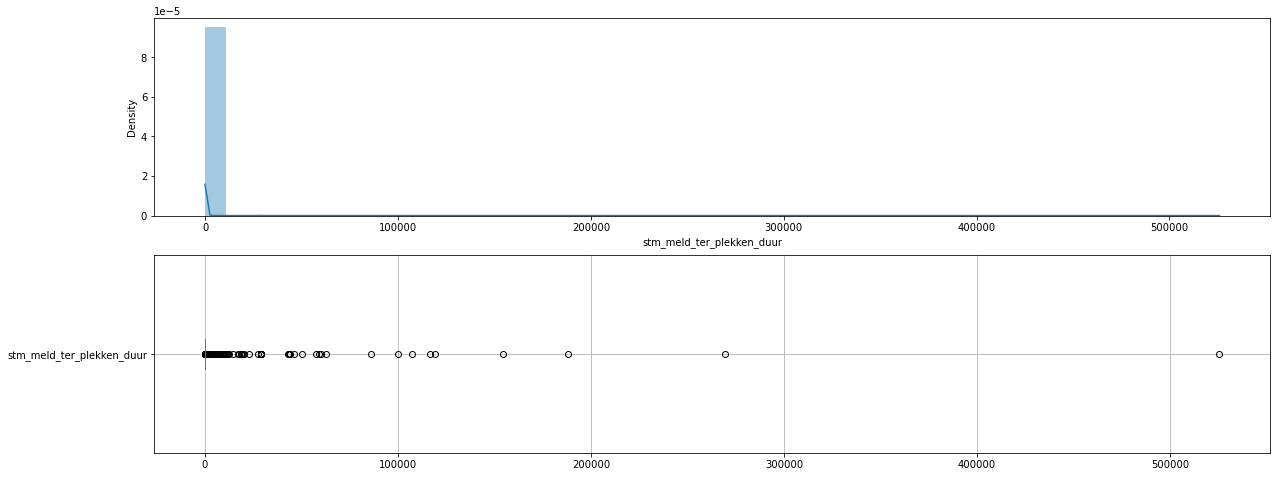

In [116]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_meld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_meld_ter_plekken_duur'], ax = ax2, vert=False)

# 5. Targetvariabele: Functie hersteltijd

Onze targetvariabele is om de Functiehersteltijd te voorspellen. We willen graag kunnen voorspellen wanneer een gemelde storing voorbij is, wat ook wel functieherstel wordt genoemd.  

##### 5.1 Overzicht functie hersteltijd duur

We kiezen ervoor om als targetvariable de stm_fh_duur te nemen. Dat is de duur in minuten tussen de melding van de storing tot het functieherstel. We willen op die manier een totalen duur kunnen voorspelen voor de eind gebruiker.


In [117]:
table['stm_fh_duur'].head()

22779      1.0
73477     24.0
84561      7.0
86473    232.0
86882      8.0
Name: stm_fh_duur, dtype: float64

##### 5.2 Verdeling functie hersteltijd duur

Hier onder geven we de verdeling weer van functie herstel duur. Er is te zien dat de duur niet normaal verdeeld is maar dat er spraken is van een rechts scheve verdeling. <br> Daarnaast zien we dat de duur een x aantal uitschieters heeft, deze uitschieters houden we in de data set omdat deze wat zeggen over de soort storing en uitloop tijden.

<AxesSubplot:>

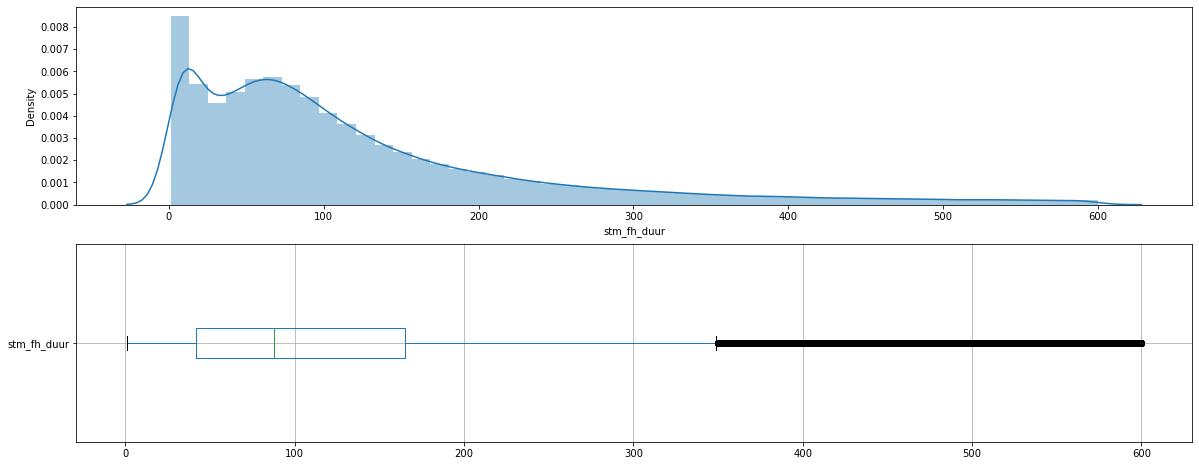

In [118]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_fh_duur, ax = ax1)
table.boxplot(['stm_fh_duur'], ax = ax2, vert=False)

# 6. Feature variabele Discrete en Continu

#### 6.1 Overzicht discreete en ratio feature variabele

Hier hebben we een duidelijk overzicht van de mogelijke continu en discrete features .

In [119]:
table.loc[:, table.dtypes == float].sample(3)

,stm_km_van_mld,stm_km_tot_mld,stm_km_van_gst,stm_km_tot_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur,stm_meld_gebeld_duur,stm_meld_ter_plekken_duur,stm_gebeld_ter_plekken_duur
156841,64800.0,65245.0,64800.0,65245.0,206.0,1.0,193.0,71.0,9.0,80.0,70.0
337699,28950.0,0.0,28950.0,0.0,8.0,0.0,74.0,66.0,4.0,70.0,66.0
379050,28900.0,28800.0,0.0,0.0,45.0,1.0,69.0,43.0,1.0,44.0,43.0


Hier onder tonen wat op eerste gezicht een correlatie zal hebben met functie hersteltijd duur. Wat op valt is dat de prognose duur een negatieve correlatie heeft met de functie hertstel tijd van -19%. Daarnaast is er nog 1 kolom  die een zwakke correlatie heeft: prognose teller ~10%.

In [120]:
corr_sample = table.corr()
corr_sample['stm_fh_duur'].sort_values()

stm_progfh_in_duur            -0.196482
#stm_sap_meldnr               -0.040316
stm_tao_telling_mutatie       -0.022030
stm_reactie_duur              -0.011551
stm_meld_gebeld_duur           0.001729
stm_km_van_mld                 0.008023
stm_km_van_gst                 0.024520
stm_km_tot_mld                 0.026765
stm_km_tot_gst                 0.027032
stm_meld_ter_plekken_duur      0.064147
stm_gebeld_ter_plekken_duur    0.067495
stm_progfh_gw_teller           0.109043
stm_fh_duur                    1.000000
Name: stm_fh_duur, dtype: float64

#### 6.2 Functie herstel prognose 

Hier onder vergelijken we de prognose duur en uiteindelijke duur met elkaar. <br> Er is op te merken dat de prognose soms precies klopt en soms ver van de echte functie herstel duur ligt.

In [121]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].sample(5, random_state=2)

,stm_progfh_in_duur,stm_fh_duur
746779,0.0,99.0
609933,0.0,40.0
876902,0.0,22.0
337489,60.0,83.0
515796,245.0,408.0


In [122]:
table['stm_progfh_in_duur'].describe()

count    3.444820e+05
mean     1.484872e+07
std      3.555720e+07
min      0.000000e+00
25%      2.500000e+01
50%      6.100000e+01
75%      1.890000e+02
max      1.051892e+08
Name: stm_progfh_in_duur, dtype: float64

Er is op te merken dat er voorspellingen tussen zitten van 999999 minuten. Zoals hier onder te zien is zal dit het gemiddelde en de verdeling erg aanpassen  

<AxesSubplot:>

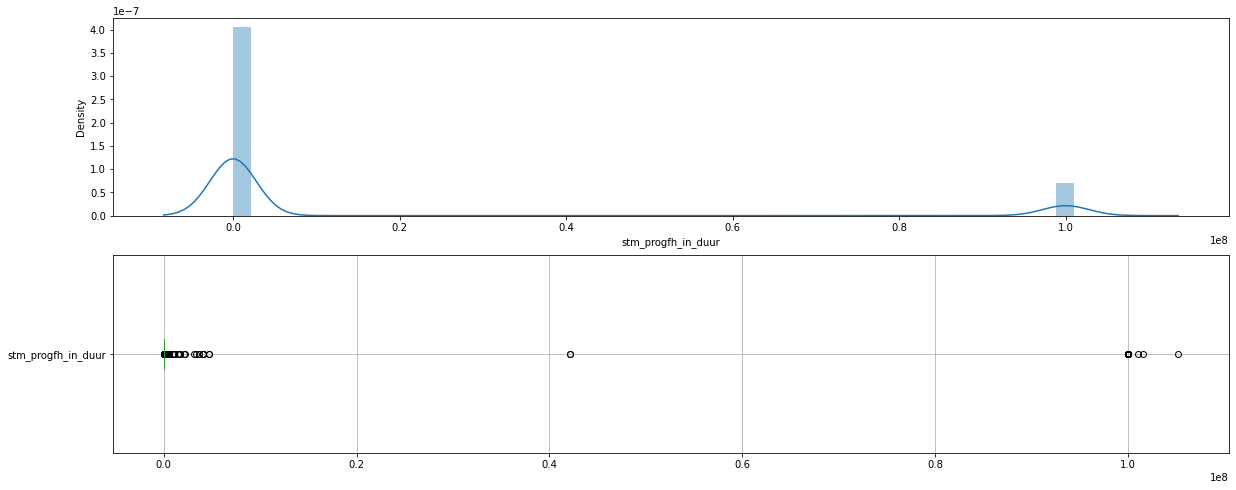

In [123]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_progfh_in_duur, ax = ax1)
table.boxplot(['stm_progfh_in_duur'], ax = ax2, vert=False)

Voor verder onderzoek halen we de 999999 waardes uit de data 

In [124]:
table = table[table['stm_progfh_in_duur'] < 999999]
table.shape

(293311, 37)

Na verder onderzoek is er hier onder te zien dat prognoses boven 900 steeds meer afdwaalt van de uiteindelijke functie herstel tijd. Er kan dus gezegt worden dat prognoses boven de 900 niet relevant zijn voor het model.

In [125]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].loc[(table['stm_progfh_in_duur'])  >= 900].sample(4)

,stm_progfh_in_duur,stm_fh_duur
592341,2912.0,123.0
496706,7326.0,289.0
262538,1730.0,47.0
562256,1815.0,115.0


In [126]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].loc[(table['stm_progfh_in_duur'])  < 900].sample(4)

,stm_progfh_in_duur,stm_fh_duur
709144,0.0,89.0
340122,117.0,242.0
349775,47.0,89.0
366113,61.0,147.0


Voor verder onderzoek halen we hier onder de prognoses duur boven rijen boven de de 900 uit de dataset

In [127]:
 table = table[table['stm_progfh_in_duur'] <= 900]

In [128]:
table.shape

(284068, 37)

Er is hieronder nu een beter verdeling te zien van prognoses duur. De uitschieters die nu nog in de data zitten zijn relevant voor het bepalen waar een storing soort langer duurt dan prognose.

<AxesSubplot:>

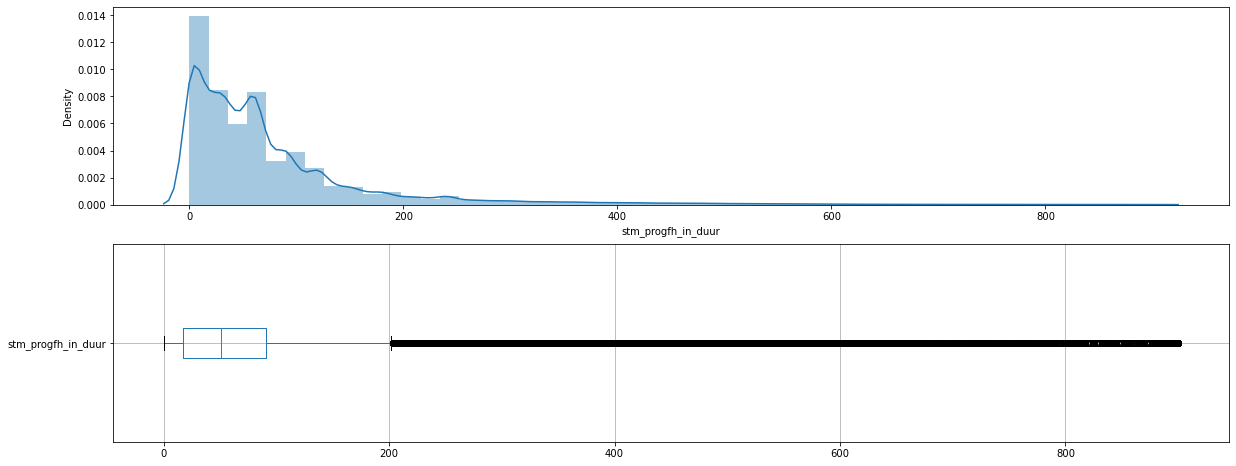

In [129]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_progfh_in_duur, ax = ax1)
table.boxplot(['stm_progfh_in_duur'], ax = ax2, vert=False)

Hier onder laten we de correlatie zien tussen de prognose en de functie herstel duur zonder de verwaarloosde data.

In [130]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].corr()

,stm_progfh_in_duur,stm_fh_duur
stm_progfh_in_duur,1.000000,0.435019
stm_fh_duur,0.435019,1.000000


#### 6.3 Prognose teller

In [131]:
# stm_progfh_gw_teller ------------------------------------------------------------

In [132]:
# table['stm_progfh_gw_teller'].value_counts()

#### 6.3 Melding ter plekken duur

In [133]:
# stm_meld_ter_plekken_duur ---------------------------------------------------------

In [134]:
# table[['stm_gebeld_ter_plekken_duur', 'stm_fh_duur']].head(5) 

## 7. Feature variabele Nominaal

#### 7.1 Overzicht Nominaal variabele

Hier hebben we een duidelijk overzicht van alle nominale features   

In [135]:
table.loc[:, table.dtypes == 'category'].sample(3)

,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_prioriteit,stm_status_melding_sap,stm_oh_pg_gst,stm_geo_gst,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_oorz_groep,stm_oorz_code,stm_fh_status,stm_tao_indicator,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst
414266,121,121.0,10621363.0,DETECTREIN,4.0,MAFS,20S,121.0,10621363.0,DETECTREIN,ONR-RIB,133.0,4.0,J,B,20.0,121-601-1000023673,S,20.0,S
783813,514,514.0,10809161.0,SEINLAMPH,4.0,MAFS PAGE,28S,514,10544708.0,SEIN,WEER,187.0,1.0,N,NB,28.0,514-603-1000063567,S,28.0,S
370585,924,924.0,10021042.0,OVERWEG,2.0,MAFS MAFD,05S,924.0,10021042.0,OVERWEG,ONR-DERD,151.0,1.0,N,NB,5.0,924-204-1000095715,S,5.0,S


Omdat de functie hersteltijd een niet normale verdeling heeft is het niet moeilijk om een directe relatie te berekenen tussen de categorieën en de functie hersteltijd duur. Er zijn wel technieken voor zoals het transformeren van de data dat het meer op een normaalverdeling lijkt om daarna point biserial corelation of ANOVA (analysis of variance) toe toepassen. Deze technieken zijn alleen voor de huidige opdracht en kennis level te hoog om goed te bevatten en toe te passen.

Er is daarom een manier bedacht om een corrolatie te berekeen die minder betrouwbaar is en maar wel een globaal beeld geeft van de category. Hier voor hebben we gebruik gemaakt van target encoding: leave one out encoder.

In [136]:
def give_leave_one_out_encoder(table, column):
    leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
    two_tables = table[column].copy()
    return leave_one_encoder.fit_transform(two_tables[column[0]].astype('category'), two_tables[column[1]])
    

Hier onder bekijken we een voorbeeld hoe de verandering plaats heeft gevonden met de uitkomst. De target encoding werkt als volgt: voor iedere category pak alle duur die er onder valt. Sommeer alle rijen die er onder vallen zonder de huidige rij waarde. Deel het uitkomst door het aantal rows die onder de categorie vallen. Vervolgens neem voor iedere element een standaarddeviatie afwijking van 0.05, deze afwijking wordt genomen om over fitting te voorkomen.

In [137]:
Example_table = table[['stm_oorz_groep', 'stm_fh_duur']].copy()
Example_table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(Example_table, ['stm_oorz_groep', 'stm_fh_duur'])

In [138]:
Example_table.sample(4)

,stm_oorz_groep,stm_fh_duur,stm_oorz_groep_looe_mean
839789,ONR-DERD,67.0,126.126403
403524,ONR-RIB,79.0,136.978180
311078,TECHONV,27.0,142.367764
444458,ONR-DERD,31.0,131.411539


#### 7.2 Oorzaak groep

Hier onder is te zien dat oorzaak groep heeft 4 categorien bevat, 

In [139]:
table.stm_oorz_groep.value_counts()

TECHONV     179310
ONR-DERD     58668
ONR-RIB      31070
WEER         15020
Name: stm_oorz_groep, dtype: int64

Hier onder is er te zien dat de verdeling van duur niet erg verspreid is.

<AxesSubplot:title={'center':'stm_fh_duur'}, xlabel='[stm_oorz_groep]'>

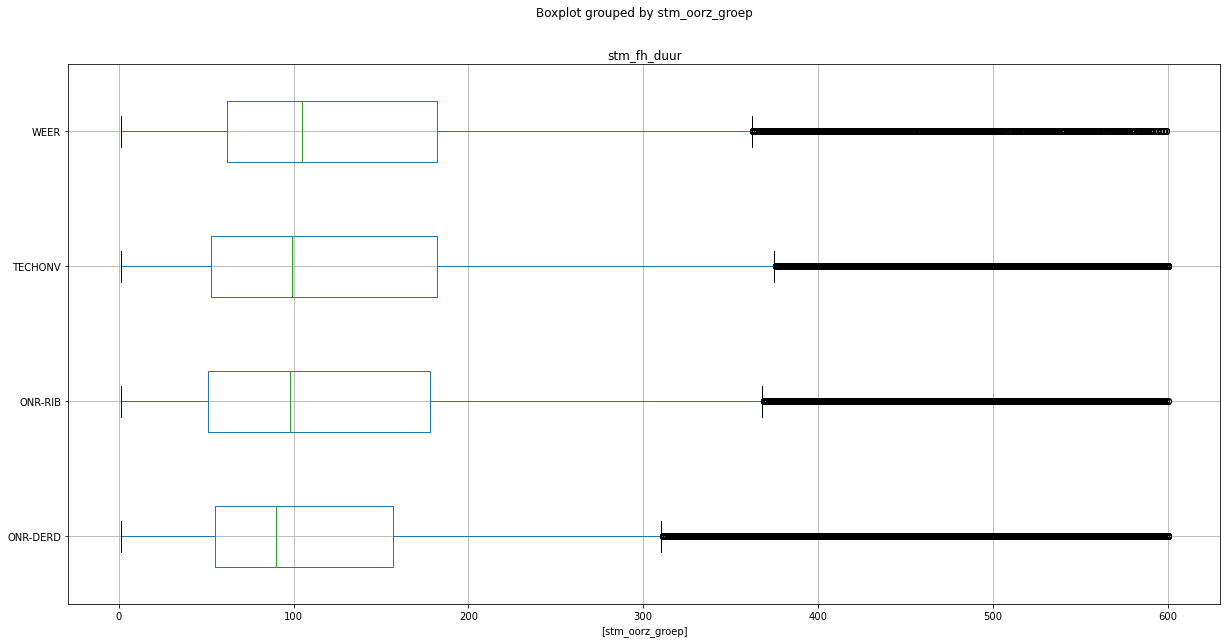

In [140]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,10))
table.boxplot(column=['stm_fh_duur'], by=['stm_oorz_groep'], ax = ax1, vert=False)

In [141]:
table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(table, ['stm_oorz_groep', 'stm_fh_duur'])
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur', 'stm_oorz_groep']].head(5)

,stm_oorz_groep_looe_mean,stm_fh_duur,stm_oorz_groep
84561,132.941649,7.0,TECHONV
86473,131.659629,232.0,ONR-RIB
86882,132.868734,8.0,ONR-RIB
93767,124.902574,18.0,ONR-DERD
95489,141.850447,195.0,TECHONV


Zoals hier boven te zien is verschillen functie herstel waardes niet erg van elkaar. Dat was op eerste gezicht ook te zien in de box plot hier boven. 

In [142]:
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur']].corr()

,stm_oorz_groep_looe_mean,stm_fh_duur
stm_oorz_groep_looe_mean,1.000000,0.021348
stm_fh_duur,0.021348,1.000000


Hier boven wordt de corrolatie getoond, Hier bij moet wel rekkening gehouden worden dat dit niet een concreect beeld is van de category maar het gemiddelde van de category en daarom maar een globaal beeld kan toonen. 

##### 7.3 Oorzaak code

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_oorz_code'>

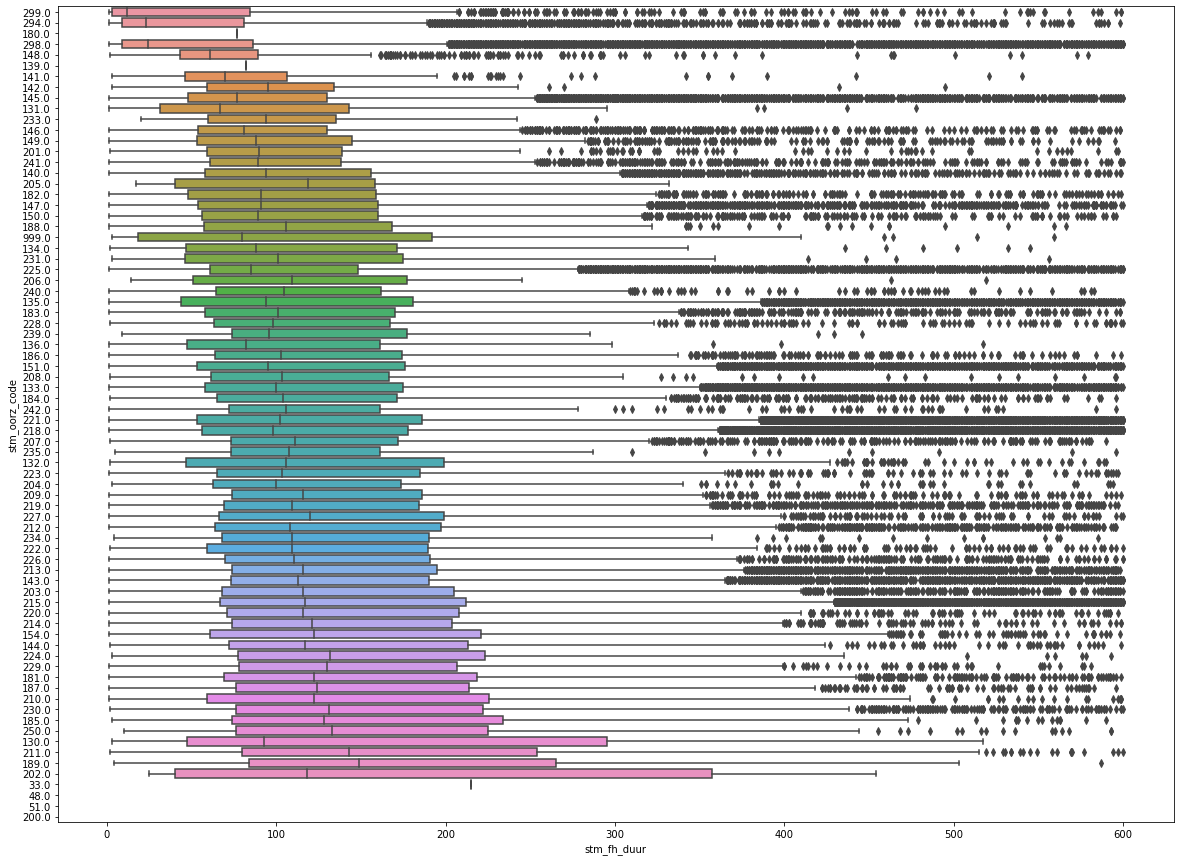

In [143]:
group_oorz = table.loc[:,['stm_fh_duur', 'stm_oorz_code']].groupby(['stm_oorz_code']).mean().sort_values(by='stm_fh_duur')
plt.figure(figsize=(20, 15))
sns.boxplot(y=table.stm_oorz_code, x=table.stm_fh_duur, order=group_oorz.index, orient="h")

In [144]:
table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(table, ['stm_oorz_groep', 'stm_fh_duur'])
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur', 'stm_oorz_code']].sample(4)

,stm_oorz_groep_looe_mean,stm_fh_duur,stm_oorz_code
767881,143.615168,48.0,207.0
746836,129.633851,106.0,147.0
309967,136.095260,258.0,140.0
430503,146.478357,183.0,215.0


In [145]:
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur']].corr()

,stm_oorz_groep_looe_mean,stm_fh_duur
stm_oorz_groep_looe_mean,1.000000,0.021694
stm_fh_duur,0.021694,1.000000


##### 7.4  Equipment nummer

In [146]:
# group_oorz = table.loc[:,['stm_fh_duur', 'stm_equipm_nr_mld']].groupby(['stm_equipm_nr_mld']).median().sort_values(by='stm_fh_duur')
# plt.figure(figsize=(20, 15))
# sns.boxplot(y=table.stm_oorz_code, x=table.stm_fh_duur, order=group_oorz.index, orient="h")

In [147]:
# fig, (ax1) = plt.subplots(1,1, figsize=(18,10))
# table.boxplot(column=['stm_fh_duur'], by=['stm_equipm_nr_mld'], ax = ax1, vert=False)

In [171]:
eave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_nr_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_equipm_nr_mld'].astype('category'), table['stm_fh_duur'])

In [172]:
table[['stm_equipm_nr_mld_looe_mean', 'stm_fh_duur']].corr()

,stm_equipm_nr_mld_looe_mean,stm_fh_duur
stm_equipm_nr_mld_looe_mean,1.000000,-0.000492
stm_fh_duur,-0.000492,1.000000


##### 7.5 Equipment soort

In [154]:
table['stm_equipm_soort_mld'].value_counts().count()

442

In [155]:
table['stm_equipm_soort_mld'].value_counts()

None          50338
WISSEL        41477
OVERWEG       31667
SEIN          25236
DETGRSSSL     13476
              ...  
FIDES             0
MODULE            0
25SCHAARDC        0
WACHSTATGB        0
C_BANK            0
Name: stm_equipm_soort_mld, Length: 442, dtype: int64

<AxesSubplot:>

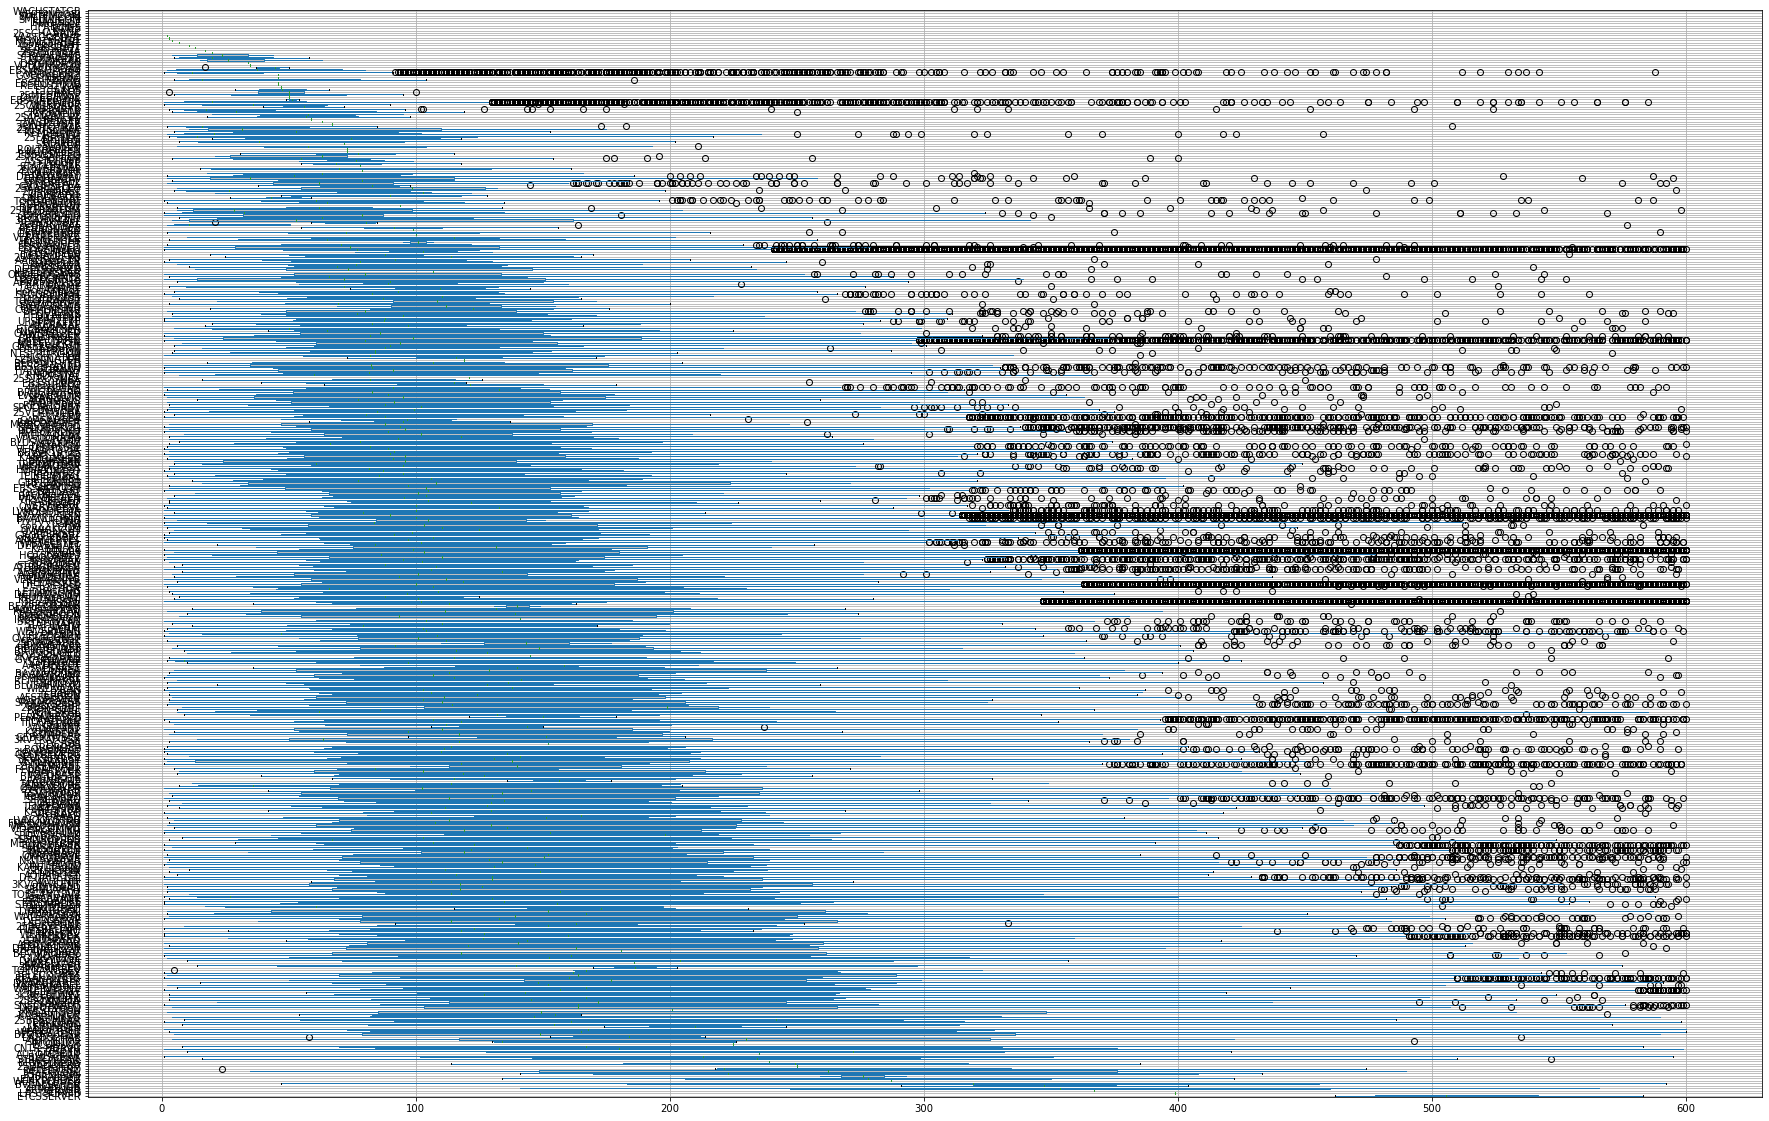

In [170]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_equipm_soort_mld"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(30,20))
table2.boxplot(ax = ax1, vert=False)

In [157]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_soort_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_equipm_soort_mld'].astype('category'), table['stm_fh_duur'])

In [158]:
table[['stm_equipm_soort_mld_looe_mean', 'stm_fh_duur']].corr()

,stm_equipm_soort_mld_looe_mean,stm_fh_duur
stm_equipm_soort_mld_looe_mean,1.000000,0.210781
stm_fh_duur,0.210781,1.000000


#### 7.6  Prioriteit

<AxesSubplot:>

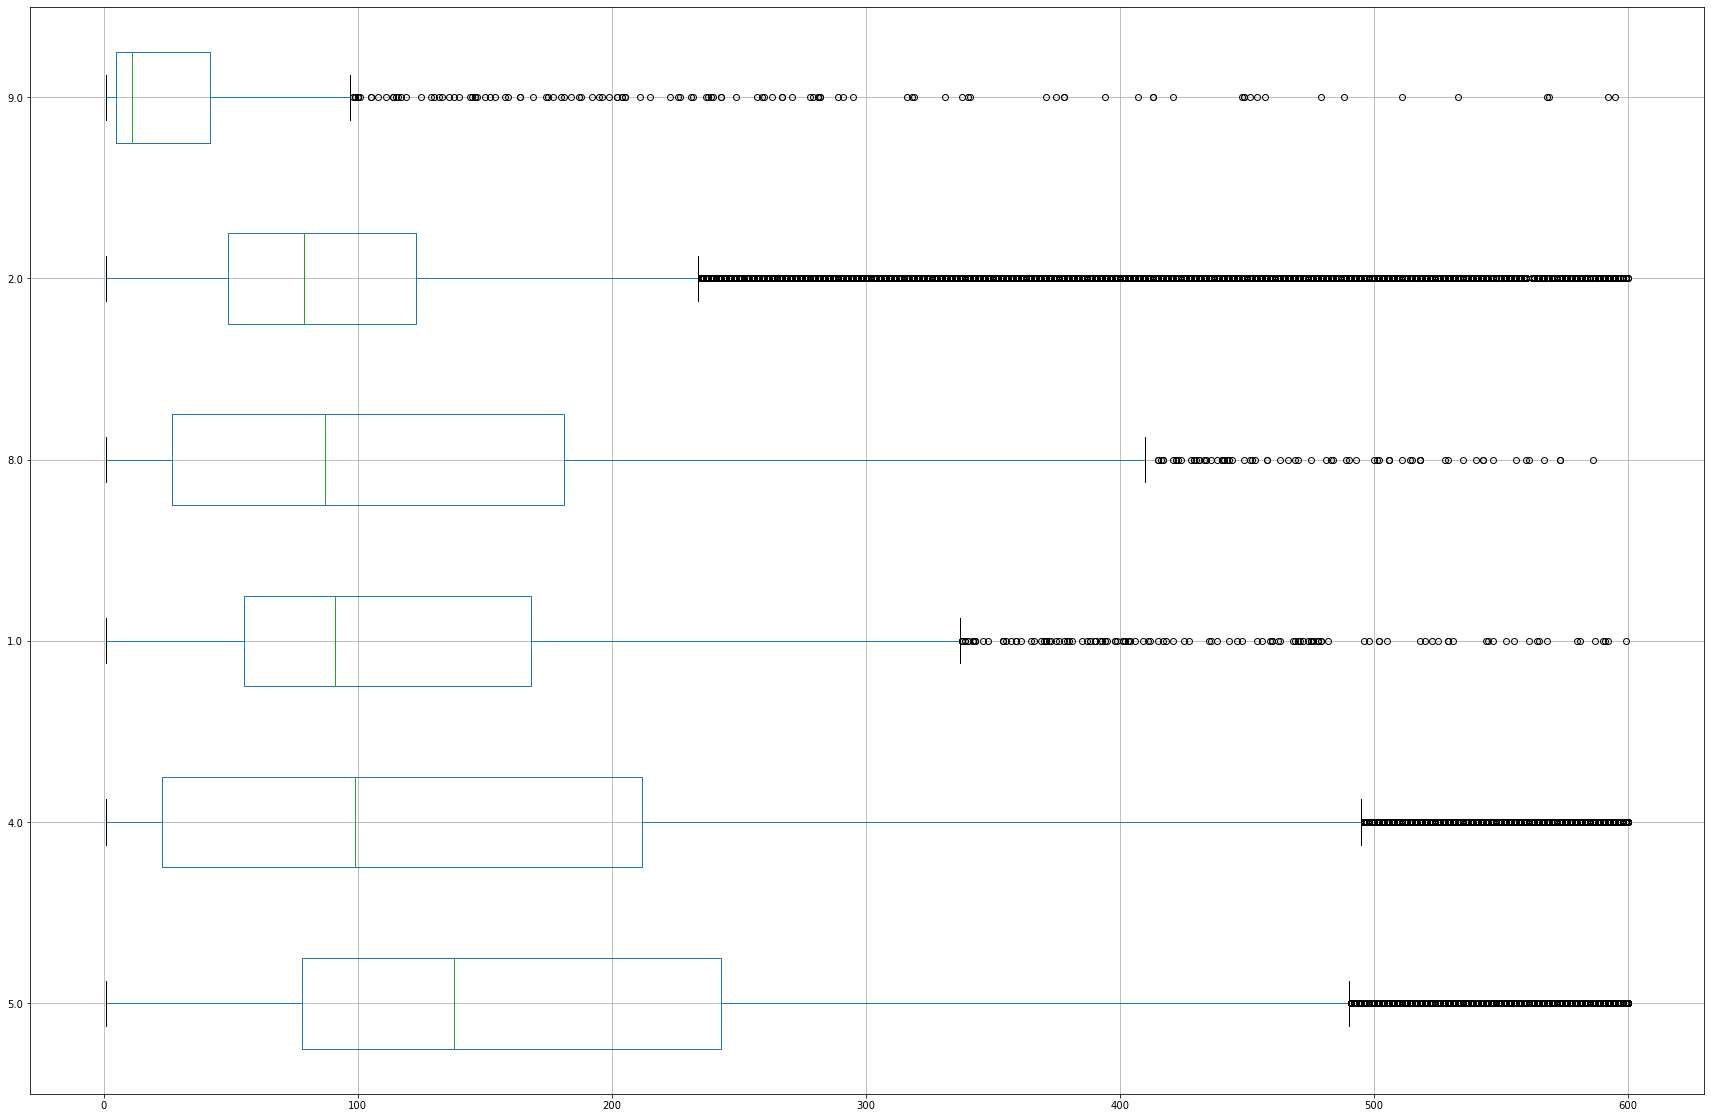

In [167]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_prioriteit"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(30,20))
table2.boxplot(ax = ax1, vert=False)

In [168]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_prioriteit_looe_mean'] = leave_one_encoder.fit_transform(table['stm_prioriteit'].astype('category'), table['stm_fh_duur'])

In [169]:
table[['stm_prioriteit_looe_mean', 'stm_fh_duur']].corr()

,stm_prioriteit_looe_mean,stm_fh_duur
stm_prioriteit_looe_mean,1.000000,-0.000275
stm_fh_duur,-0.000275,1.000000


In [162]:
table.shape

(284068, 40)

In [ ]:
table.isna().sum()

In [ ]:
# fig, (ax1) = plt.subplots(1,1, figsize=(30,20))
# table.boxplot(column=['stm_fh_duur'], by=['stm_equipm_soort_mld'], ax = ax1, vert=False)

In [ ]:
# table[table['stm_gebeld_ter_plekken_duur'] < 0].count()

In [ ]:
# fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
# sns.distplot(table.stm_meld_ter_plekken_duur, ax = ax1)
# table.boxplot(['stm_meld_ter_plekken_duur'], ax = ax2, vert=False)

In [ ]:
# table[['stm_meld_gebeld_duur', 'stm_meld_ter_plekken_duur', 'stm_gebeld_ter_plekken_duur', 'stm_fh_duur']].head(20)

In [164]:
table.corr()['stm_fh_duur'].sort_values()

stm_tao_telling_mutatie          -0.044592
stm_reactie_duur                 -0.035865
#stm_sap_meldnr                  -0.020882
stm_meld_gebeld_duur             -0.000730
stm_prioriteit_looe_mean         -0.000730
stm_km_tot_mld                    0.006558
stm_km_van_mld                    0.008415
stm_km_tot_gst                    0.009389
stm_km_van_gst                    0.017676
stm_oorz_groep_looe_mean          0.021694
stm_meld_ter_plekken_duur         0.062828
stm_gebeld_ter_plekken_duur       0.064159
stm_progfh_gw_teller              0.078476
stm_equipm_soort_mld_looe_mean    0.210781
stm_progfh_in_duur                0.435019
stm_fh_duur                       1.000000
Name: stm_fh_duur, dtype: float64